O

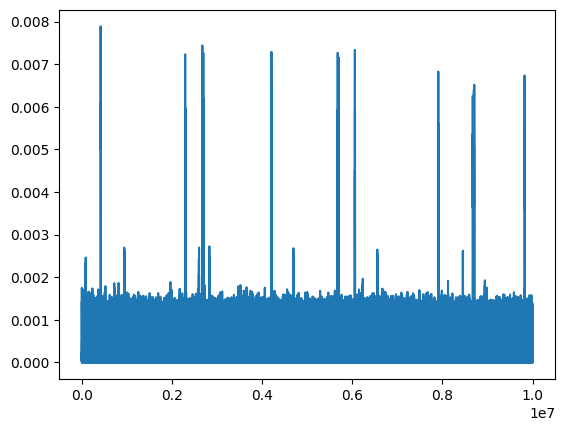

: 

In [5]:
import uhd
import numpy as np
import matplotlib.pyplot as plt

usrp = uhd.usrp.MultiUSRP()

num_samps = 10000000 # number of samples received
center_freq = 2400e6 # Hz
sample_rate = 10e6 # Hz
gain = 10 # dB

usrp.set_rx_rate(sample_rate, 0)
usrp.set_rx_freq(uhd.libpyuhd.types.tune_request(center_freq), 0)
usrp.set_rx_gain(gain, 0)

# Set up the stream and receive buffer
st_args = uhd.usrp.StreamArgs("fc32", "sc16")
st_args.channels = [0]
metadata = uhd.types.RXMetadata()
streamer = usrp.get_rx_stream(st_args)
recv_buffer = np.zeros((1, 1000), dtype=np.complex64)

# Start Stream
stream_cmd = uhd.types.StreamCMD(uhd.types.StreamMode.start_cont)
stream_cmd.stream_now = True
streamer.issue_stream_cmd(stream_cmd)

# Receive Samples
samples = np.zeros(num_samps, dtype=np.complex64)
for i in range(num_samps//1000):
    streamer.recv(recv_buffer, metadata)
    samples[i*1000:(i+1)*1000] = recv_buffer[0]

# Stop Stream
stream_cmd = uhd.types.StreamCMD(uhd.types.StreamMode.stop_cont)
streamer.issue_stream_cmd(stream_cmd)


#np.fft.fft
plt.plot(np.abs((samples)))
plt.show()

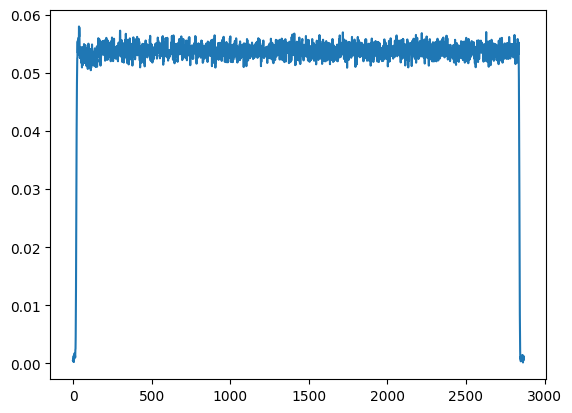

In [29]:

#np.fft.fft
plt.plot(np.abs((samples[387600+3800:397600-3330])))
plt.show()

Important Warning: (scalePhaseGradientToHz) No sampling frequency specified, using default Fs of 10.0Msps.
IMPORTANT WARNING: (bitFinderFromPhaseGradient) No sampling frequency specified, using default Fs of 10.0Msps.


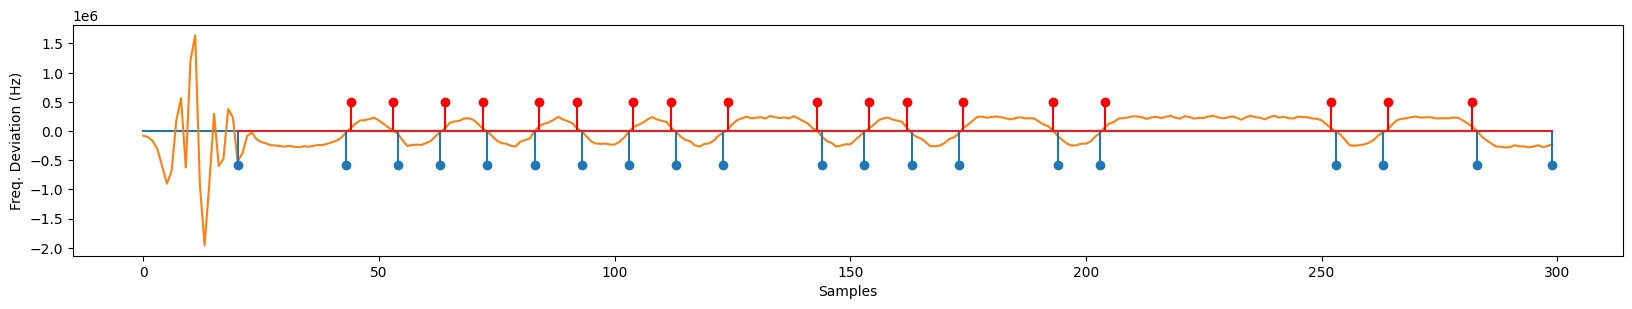

In [40]:
import IQ

iq = IQ.IQ(Fc= center_freq-5e3, Fs=sample_rate)

x = iq.apply(methods={

iq.bitFinderFromPhaseGradient: {'plot': True},
iq.scalePhaseGradientToHz: None,
iq.gradient: None,
iq.unwrapPhase: None,
iq.phase: None,
iq.butter: {"cutoff": 4e6},
iq.demodulate: None
},frame=samples[387600+3800:397600-3330][0:300])

""
